# We Rate Dogs Data Wrangle and analyze

## Gathering Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns

In [3]:
# read the twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# change index to become tweet ID
twitter_archive.set_index("tweet_id", inplace = True)

In [4]:
# first 5 lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# extract info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

# Tweet image prediction

In [6]:
#URL downloaded programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# change index to the Tweet ID
image_prediction.set_index("tweet_id", inplace = True)
# display 5 lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Twitter API File

In [7]:
# Downloaded the file manualy from the resources
# read tweet-jason file
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display 5 rows
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

# Assessing data

In [8]:
# Assessing Data by check samples
twitter_archive.sample(10)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
757741869644341248,NaN,NaN,2016-07-26 00:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonard. He hides in bushes to escape ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757741869...,10,10,Leonard,None,None,None,None
834209720923721728,NaN,NaN,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,None,None,None,None
687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None
685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
816697700272001025,NaN,NaN,2017-01-04 17:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,None,None,None,None
676575501977128964,NaN,NaN,2015-12-15 01:32:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is very passionate about Christmas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676575501...,8,10,None,None,None,pupper,None
777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
699788877217865730,NaN,NaN,2016-02-17 02:54:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Nala. She's a Freckled High Brusc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699788877...,12,10,Nala,None,None,None,None


In [9]:
# extract info of DF
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [10]:
# check for any duplicates in ID
twitter_archive.index.is_unique

True

In [11]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [12]:
# number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [13]:
# check names of the dogs
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
Daisy            7
Bailey           7
an               7
Toby             7
Buddy            7
Scout            6
Bella            6
Milo             6
Leo              6
Jack             6
Koda             6
Oscar            6
Dave             6
Rusty            6
Jax              6
Stanley          6
Oakley           5
              ... 
Pip              1
Skittle          1
Snoop            1
Filup            1
Mollie           1
Dook             1
Bowie            1
Toffee           1
Gordon           1
Aqua             1
Marvin           1
Danny            1
Bertson          1
Bert             1
Jay              1
Jo               1
by               1
Bradlay          1
Winifred         1
Stark            1
Akumi            1
Lupe        

In [14]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)
# Categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [15]:
# Check denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# extract denominator more than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the flo...,70
775096608509886464,"RT @dog_rates: After so many requests, this is...",11
758467244762497024,Why does this never happen at my front door......,150
740373189193256964,"After so many requests, this is Bretagne. She ...",11
731156023742988288,Say hello to this unbelievably well behaved sq...,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20
716439118184652801,This is Bluebert. He just saw that both #Final...,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90


In [17]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# check for floats in the ratings
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [19]:
# check expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,NaN
879674319642796034,@RealKentMurphy 14/10 confirmed,NaN
831650051525054464,"I usually only share these on Friday's, but th...","http://www.gofundme.com/bluethewhitehusky,http..."


In [20]:
# check for counts of URL
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

# Quality and Tideness issues in the file

### Tideness Issues
1. Dog Categories/ stages (doggo, floofer, pupper or puppo) should be one column.
2. we have 639 expanded urls which contain more than one url address.
3. some of the gathered ratings are replies and retweets and should be removed.
4. remove columns that will not be used

### Quality Issues
1. The timestamp has an incorrect datatype - is an object, should be DateTime.
2. Correct denominators other than 10.
3. some dogs have more than one category for the same dog.
4. some numerator are outliers which need to be considered

### Image Predicition

In [21]:
# display sample of data
image_prediction.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,Pekinese,0.596882,True,Maltese_dog,0.176478,True,Great_Pyrenees,0.026775,True
674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True
671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True


In [22]:
# Extract a summary of a DF
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [23]:
# Check File for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [24]:
# Check for any file type other than JPG and PNG.
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [25]:
# Check Counts
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
image_prediction.p1.sample(5)

tweet_id
673270968295534593                  Shih-Tzu
674255168825880576                Eskimo_dog
666447344410484738    curly-coated_retriever
672222792075620352                    beagle
719551379208073216                  malamute
Name: p1, dtype: object

In [27]:
# check dog predictions count
image_prediction.p1_dog.count()

2075

## Quality and tidness "Image Predications"

#### Quality Issues
1. only 2075 images have been classified as dog images for top prediction.
2. the dataset has 2075 entries, while twitter archive dataset has 2356 entries due to images thatnot classified as dog images.
4. dataset should be merged with the twitter archive dataset.

#### Tideness Issues
4. 66 jpg_url duplicates were found.


## Assess: Twitter API Data

In [28]:
# display sample of data
twitter_api.sample(5)

,favorites,retweets
tweet_id,,
754747087846248448,2854,591
680115823365742593,2972,1028
782305867769217024,18630,6470
669324657376567296,525,223
673697980713705472,4067,2165


In [29]:
# DF Summary
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [30]:
# Check Duplicates and Uniques
twitter_archive.index.is_unique

True

### Quality & Tidiness Issues in Twitter API Data

##### Quality Issue
Twitter archive Data set have entries more thean twitter API

## Cleaning Data

###### Define
Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

###### Code

In [31]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

###### Test

In [32]:
# display sample of data
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,0,0,0,0,0
831309418084069378,NaN,NaN,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,0,0,0,0,0
676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,0,0,0,0,0
888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,0,0,0,0,0
674781762103414784,NaN,NaN,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,None,0,0,0,0,0


###### Define
remove retweets data from data set

###### Code

In [33]:
# display shape of dataframe
twitter_archive_clean.shape

(2356, 17)

In [34]:
# Get retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [35]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [36]:
# All Columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [37]:
# Remove Columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

###### Test

In [38]:
twitter_archive_clean.sample(5)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
666644823164719104,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,0,0,0,0,0
880935762899988482,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,0,0,0,0,0
809220051211603969,2016-12-15 02:14:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyro. He's a Stratocumulus Flop. Tongu...,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,0,0,0,0,0
667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,0,0,0,0,0
693262851218264065,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,https://twitter.com/dog_rates/status/693262851...,11,10,None,0,0,1,0,1


##### Define

Dog classification (doggo, floofer, pupper or puppo) should be one column.


Some dogs have more than one category assigned.

###### Code

In [39]:
# Sample
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,0


In [40]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

###### Test

In [41]:
# load data after modification
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
679132435750195208,2015-12-22 02:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a river dancer. His friend...,https://twitter.com/dog_rates/status/679132435...,10,10,Louis,0,NaN
772117678702071809,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,0,NaN
703268521220972544,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,https://twitter.com/dog_rates/status/703268521...,12,10,None,1,Pupper


###### Define

The timestamp has an incorrect datatype - is an object, should be DateTime

Solution:

convert to datetime.

###### Code

In [42]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [43]:
# Load after modification
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
number_categories     2175 non-null int64
dog_type              385 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB


###### Define

Float ratings have been incorrectly read from the text of tweet

Solution:
gather correct rating when rating is a fraction.

In [44]:
# Load Data
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
681340665377193984,I've been told there's a slight possibility he...,10,5
883482846933004288,This is Bella. She hopes her smile made you sm...,10,5
680494726643068929,Here we have uncovered an entire battalion of ...,10,26


In [45]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [46]:
# Load Data after modification
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
681340665377193984,I've been told there's a slight possibility he...,10.0,9.50
680494726643068929,Here we have uncovered an entire battalion of ...,10.0,11.26
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10.0,9.75


In [47]:
# Correct denominators other than 10.

In [48]:
# save index of tweets with denominator greater than 10
high_denominator = twitter_archive[twitter_archive.rating_denominator > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_denominator,rating_numerator
tweet_id,,,
677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,120.0,144.0
722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20.0,4.0
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,40.0,44.0


In [49]:
# Change donminators manually
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [50]:
# Test
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,10.0,13.0
684225744407494656,"Two sneaky puppers were not initially seen, mo...",130.0,143.0
684222868335505415,Someone help the girl is being mugged. Several...,110.0,121.0


In [51]:
# Normal RATING
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

###### TEST

In [52]:
# Test
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(15)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
855459453768019968,"Guys, we only rate dogs. This is quite clearly...",10.0,12.0,1.2
746056683365994496,This is Arlen and Thumpelina. They are best pa...,10.0,11.0,1.1
757393109802180609,Here's a doggo completely oblivious to the dou...,10.0,10.0,1.0
672640509974827008,This is Leonidas. He just got rekt by a snowba...,10.0,9.0,0.9
846505985330044928,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,10.0,11.0,1.1
669567591774625800,Meet Kollin. He's a Parakeetian Badminton from...,10.0,9.0,0.9
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,40.0,44.0,1.1
674664755118911488,This is Rodman. He's getting destroyed by the ...,10.0,10.0,1.0
687460506001633280,This is Kramer. He's a Picasso Tortellini. Tie...,10.0,10.0,1.0


In [53]:
# 4. we have 639 expanded urls which contain more than one url address.
# build correct links by using tweet id


In [54]:
# Fix URLs
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
twitter_archive_clean.sample(5)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/dog_rates/status/871102520...,14.0,10.0,None,1.0,Doggo,1.4
668852170888998912,2015-11-23 18:02:38,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,https://twitter.com/dog_rates/status/668852170...,11.0,10.0,Bobb,0.0,NaN,1.1
798933969379225600,2016-11-16 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,https://twitter.com/dog_rates/status/798933969...,12.0,10.0,Iroh,0.0,NaN,1.2
800388270626521089,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12.0,10.0,Doc,1.0,Floofer,1.2
703769065844768768,2016-02-28 02:29:55,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,https://twitter.com/dog_rates/status/703769065...,10.0,10.0,None,0.0,NaN,1.0


## Image Predictions Data Cleaning

###### Define
Change column names to descriptive names.

###### Code

In [55]:
# create dataset copy
image_prediction_clean = image_prediction.copy()

In [56]:
# display sample of data
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
684902183876321280,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,Pembroke,0.708034,True,Cardigan,0.291447,True,dingo,0.000185,False
775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True


In [57]:
# Change column names to descriptive names.
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [58]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

###### TEST

In [59]:
# Check modified labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

###### Define

Only 2075 images have been classified as dog images for top prediction

If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

###### Code

In [60]:

# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

###### TEST

In [61]:
# Check after modification
image_prediction_clean.sample(5)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,toy_poodle,0.037662
669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231
683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509
673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401
690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,Mexican_hairless,0.098171


### Cleaning Twitter API

###### Test

In [62]:
# Display Data
twitter_api.sample(5)

,favorites,retweets
tweet_id,,
666337882303524864,204,96
675517828909424640,1414,507
764857477905154048,7099,2029
709449600415961088,2420,665
670069087419133954,676,278


# No issue found

## Storing Data
merge dataset and create new combined file with name twitter_archive_master.csv

In [63]:
#Merge
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [64]:
#test
df.sample(5)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
707059547140169728,2016-03-08 04:25:07,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cupcake. She's an Icelandic Dippe...,https://twitter.com/dog_rates/status/707059547...,11.0,10.0,Cupcake,0.0,NaN,1.1,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,2796,759
673580926094458881,2015-12-06 19:13:01,"<a href=""http://twitter.com/download/iphone"" r...",When you ask your professor about extra credit...,https://twitter.com/dog_rates/status/673580926...,8.0,10.0,None,0.0,NaN,0.8,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,882,297
813096984823349248,2016-12-25 19:00:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,https://twitter.com/dog_rates/status/813096984...,11.0,10.0,Rocky,1.0,Doggo,1.1,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056,11694,4207
698355670425473025,2016-02-13 03:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,https://twitter.com/dog_rates/status/698355670...,10.0,10.0,Jessiga,0.0,NaN,1.0,https://pbs.twimg.com/media/CbEOxQXW0AEIYBu.jpg,1,pug,0.990191,2046,516
674793399141146624,2015-12-10 03:30:58,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,https://twitter.com/dog_rates/status/674793399...,13.0,10.0,None,0.0,NaN,1.3,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,1,giant_schnauzer,0.119693,2697,1225


In [65]:
# Store DF to CSV
df.to_csv('twitter_archive_master.csv')

In [66]:
# display sample of data
df.sample(5)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
673705679337693185,2015-12-07 03:28:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,https://twitter.com/dog_rates/status/673705679...,8.0,10.0,Dot,0.0,NaN,0.8,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,1337,439
671789708968640512,2015-12-01 20:35:22,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,https://twitter.com/dog_rates/status/671789708...,13.0,10.0,space,0.0,NaN,1.3,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,7527,3811
676949632774234114,2015-12-16 02:19:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrus. He's a Speckled Centennial Tico...,https://twitter.com/dog_rates/status/676949632...,8.0,10.0,Tyrus,0.0,NaN,0.8,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1,Welsh_springer_spaniel,0.206479,1413,448
858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10.0,None,1.0,Doggo,1.3,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,16304,3771
786664955043049472,2016-10-13 20:28:35,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",https://twitter.com/dog_rates/status/786664955...,12.0,10.0,None,0.0,NaN,1.2,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,11957,2996


In [67]:
# Check data summary
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,11.409122,10.503559,0.160142,1.085295,1.215896,0.549936,9233.109727,2817.118031
std,7.880929,6.875125,0.382683,0.186785,0.576191,0.299270,12583.246963,4807.199770
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302892,2163.250000,649.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4440.000000,1437.500000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.821962,11656.750000,3247.750000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


### Analysis

The most frequent rating is 11.40 as per the Mean of the rating


Favorites are 9233 with 2817 retweets which is good

##### Common Breeds

In [68]:
# Display the number for each dog's breed 
df['breed_predicted'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
Cardigan                           21
German_shepherd                    21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Maltese_dog                        19
Shetland_sheepdog                  19
Rottweiler                         19
Lakeland_terrier                   18
kuvasz                             18
Italian_grey

In [69]:
# horizontal bar plot function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):
    
    plt.figure(figsize=(8,5)) 


    bar_list = plt.barh(x,y, color="#3F5D7D", edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

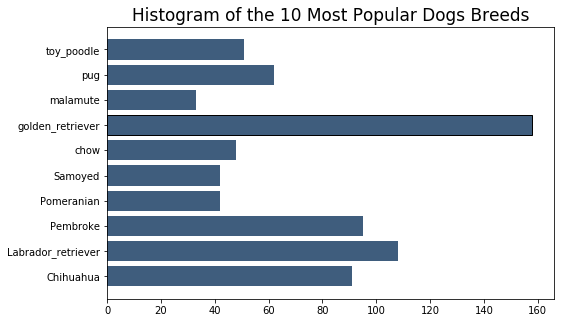

In [70]:

# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

Golden Retriever, Labrador Retriever, Pembroke are the most Common dog breeds!

##### Average rating among dog Breeds

In [71]:
# Mean
df_dog_type_mean = df.groupby('breed_predicted').mean()

In [72]:
df_dog_type_mean.head()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan_hound,9.666667,10.0,0.000000,0.966667,1.000000,0.433959,17326.666667,5976.0000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American_Staffordshire_terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian_terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [73]:
# Sort
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.880000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
Tibetan_terrier                0.925000
dalmatian                      0.933333
Boston_bull                    0.941667
Welsh_springer_spaniel         0.950000
Maltese_dog                    0.952632
Dandie_Dinmont                 0.957143
miniature_schnauzer            0.960000
Norwich_terrier                0.960000
Afghan_hound                   0.966667
redbone                        0.966667
Scottish_deerhound             0.975000
Rhodesian_ridgeback            0.975000
Airedale                       0.983333
Newfoundland                   0.985714
Mexican_hairless               0.985714
Saint_Bernard                  0.985714
English_setter                 0.987500
miniature_poodle               0.987500
miniature_pinscher             1.000000
groenendael                    1.000000
Italian_greyhound       

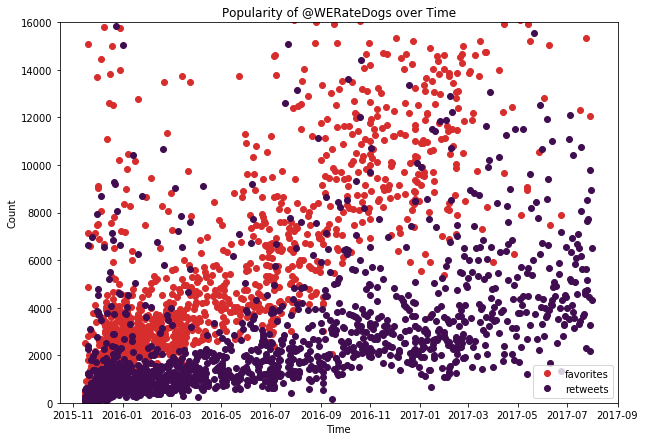

In [74]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#d82d2d")
ax.plot_date(d,df.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

There is significant increase in popularity for we rate dogs page

###### Dog Categories

We rate dogs have 4 Categories based : doggo, pupper, puppo, and floofr.

In [75]:
df.dog_type.value_counts()

Pupper     187
Doggo       67
Puppo       26
Floofer      8
Name: dog_type, dtype: int64

In [76]:
# Bar
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=14)
    
    plt.ylabel(ylabel,
               fontsize=14)

    return plt.show()

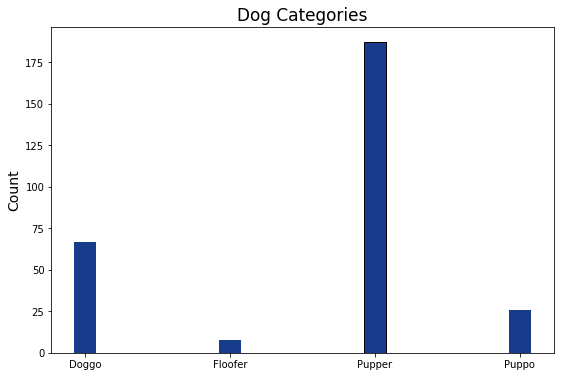

In [77]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.15, 
         title="Dog Categories", 
         ylabel="Count")

The most Common Category is the Pupper and floofer is the least one, others are average common